<a href="https://colab.research.google.com/github/sidheshsahu/practice/blob/main/Copy_of_UpdatedActivity2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install tensorflow==2.12.0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [ ]:
train_data_dir="/content/drive/MyDrive/Activity4images/Overall Folder/train"
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 561 images belonging to 4 classes.
Found 138 images belonging to 4 classes.


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu', kernel_initializer='glorot_uniform'),
    Dropout(0.3),
    Dense(4, activation='softmax', kernel_initializer='glorot_uniform')
])


58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

Epoch 1/5
18/18 [==============================] - 469s 25s/step - loss: 1.0369 - accuracy: 0.6132 - val_loss: 0.4158 - val_accuracy: 0.8696
Epoch 2/5
18/18 [==============================] - 390s 22s/step - loss: 0.3877 - accuracy: 0.8538 - val_loss: 0.2566 - val_accuracy: 0.9275
Epoch 3/5
18/18 [==============================] - 387s 22s/step - loss: 0.2489 - accuracy: 0.9216 - val_loss: 0.2249 - val_accuracy: 0.9203
Epoch 4/5
18/18 [==============================] - 377s 21s/step - loss: 0.1877 - accuracy: 0.9447 - val_loss: 0.2276 - val_accuracy: 0.8986
Epoch 5/5
18/18 [==============================] - 378s 21s/step - loss: 0.1342 - accuracy: 0.9519 - val_loss: 0.1692 - val_accuracy: 0.9493


In [ ]:
model.save('your_model1.h5')

1/1 [==============================] - 1s 608ms/step


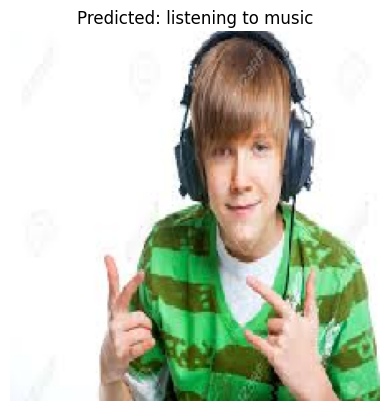

Predicted class: listening to music
Predicted probabilities (in %): [ 9.97  0.11  0.   89.92]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


activities = [
    'reading a book',
    'riding a bicycle',
    'watching a sunrise or sunset',
    'listening to music'
]


def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array, img




def predict_and_display(img_path):
    img_array, img = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    predicted_activity = activities[predicted_class_index]
    prediction_percentages = np.round(prediction[0] * 100, 2)




    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_activity}")
    plt.show()

    print(f"Predicted class: {predicted_activity}")
    print(f"Predicted probabilities (in %): {prediction_percentages}")


image_path = '/content/drive/MyDrive/Activity4images/Overall Folder/test/listen to a music/images11.jpeg'
predict_and_display(image_path)


1/1 [==============================] - 0s 447ms/step


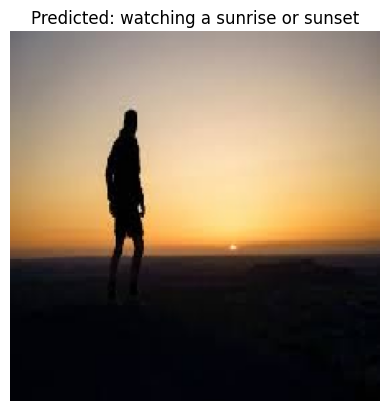

Predicted class: watching a sunrise or sunset
Predicted probabilities (in %): [ 0.17  1.53 98.05  0.25]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


activities = [
    'reading a book',
    'riding a bicycle',
    'watching a sunrise or sunset',
    'listening to music'
]


def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array, img




def predict_and_display(img_path):
    img_array, img = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    predicted_activity = activities[predicted_class_index]
    prediction_percentages = np.round(prediction[0] * 100, 2)




    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_activity}")
    plt.show()

    print(f"Predicted class: {predicted_activity}")
    print(f"Predicted probabilities (in %): {prediction_percentages}")


image_path = '/content/drive/MyDrive/Activity4images/Overall Folder/test/Watching a sunrise/RiseSet - 2024-09-26T115214.664.jpeg'
predict_and_display(image_path)


1/1 [==============================] - 1s 826ms/step


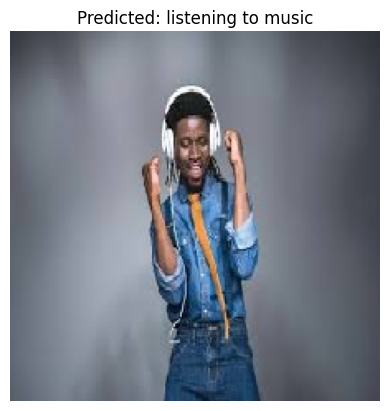

Predicted class: listening to music
Predicted probabilities (in %): [1.600e-01 4.690e+00 1.000e-02 9.514e+01]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


activities = [
    'reading a book',
    'riding a bicycle',
    'watching a sunrise or sunset',
    'listening to music'
]


def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array, img




def predict_and_display(img_path):
    img_array, img = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    predicted_activity = activities[predicted_class_index]
    prediction_percentages = np.round(prediction[0] * 100, 2)




    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_activity}")
    plt.show()

    print(f"Predicted class: {predicted_activity}")
    print(f"Predicted probabilities (in %): {prediction_percentages}")


image_path = '/content/drive/MyDrive/Activity4images/Overall Folder/test/listen to a music/images10.jpeg'
predict_and_display(image_path)


1/1 [==============================] - 0s 456ms/step


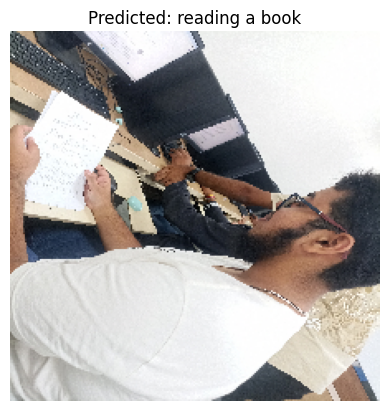

Predicted class: reading a book
Predicted probabilities (in %): [9.898e+01 6.000e-02 1.000e-02 9.500e-01]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


activities = [
    'reading a book',
    'riding a bicycle',
    'watching a sunrise or sunset',
    'listening to music'
]


def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array, img




def predict_and_display(img_path):
    img_array, img = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    predicted_activity = activities[predicted_class_index]
    prediction_percentages = np.round(prediction[0] * 100, 2)




    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_activity}")
    plt.show()

    print(f"Predicted class: {predicted_activity}")
    print(f"Predicted probabilities (in %): {prediction_percentages}")


image_path = '/content/drive/MyDrive/Activity4images/Overall Folder/1728031745710.jpg'
predict_and_display(image_path)


1/1 [==============================] - 0s 464ms/step


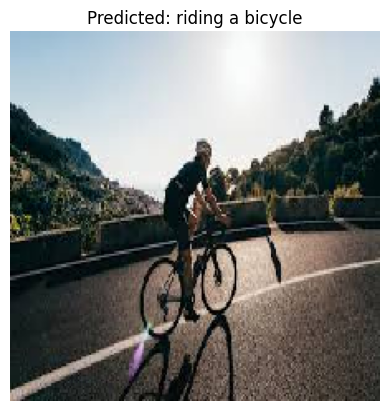

Predicted class: riding a bicycle
Predicted probabilities (in %): [1.00e-02 9.97e+01 2.80e-01 1.00e-02]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


activities = [
    'reading a book',
    'riding a bicycle',
    'watching a sunrise or sunset',
    'listening to music'
]


def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array, img




def predict_and_display(img_path):
    img_array, img = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    predicted_activity = activities[predicted_class_index]
    prediction_percentages = np.round(prediction[0] * 100, 2)




    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_activity}")
    plt.show()

    print(f"Predicted class: {predicted_activity}")
    print(f"Predicted probabilities (in %): {prediction_percentages}")


image_path = '/content/drive/MyDrive/Activity4images/Overall Folder/test/Riding a bicycle/download6.jpeg'
predict_and_display(image_path)


In [ ]:
pip show tensorflow


Name: tensorflow
Version: 2.12.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, jax, keras, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


In [ ]:
!pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/

In [ ]:
import gradio as gr
import torch
from torchvision import transforms
from PIL import Image

# Load the PyTorch model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = torch.load('your_model.pth', map_location=device)
model.to(device)
model.eval()

activities = [
    'reading a book',
    'riding a bicycle',
    'watching a sunrise or sunset',
    'listening to music'
]

# Define the image preprocessing function
def preprocess_image(img):
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    img_tensor = preprocess(img).unsqueeze(0).to(device)  # Send image tensor to GPU
    return img_tensor

# Define the prediction function
def predict_activity(img):
    img_tensor = preprocess_image(img)
    with torch.no_grad():
        prediction = model(img_tensor)
    predicted_class_index = prediction.argmax(dim=1).item()
    predicted_activity = activities[predicted_class_index]
    prediction_percentages = (torch.nn.functional.softmax(prediction, dim=1)[0] * 100).cpu().numpy()
    return predicted_activity, {activities[i]: round(prediction_percentages[i], 2) for i in range(len(activities))}

# Set up Gradio Interface
interface = gr.Interface(
    fn=predict_activity,
    inputs=gr.Image(type="pil"),
    outputs=[
        gr.Textbox(label="Predicted Activity"),
        gr.Label(label="Prediction Probabilities")
    ],
    live=False,
    title="Activity Recognition on GPU",
    description="Upload an image to predict the activity using GPU"
)

# Launch the interface
interface.launch(share=True)


<ipython-input-17-1607c860cb71>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('your_model.pth', map_location=device)


FileNotFoundError: [Errno 2] No such file or directory: 'your_model.pth'